In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import BinaryCrossentropy

from PIL import Image
import os
import numpy as np

import matplotlib.pyplot as plt


#Insert Additional Libraries here

##Upload Kaggle.json api key here##

In [ ]:
from google.colab import files
files.upload()

print('Uploaded!')

Saving kaggle.json to kaggle.json
Uploaded!


##Configure kaggle to be used in Google Colab##

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!pip install -q kaggle
!pip install -q kaggle-cli

     |████████████████████████████████| 81kB 3.5MB/s 
     |████████████████████████████████| 5.3MB 8.3MB/s 
     |████████████████████████████████| 112kB 57.4MB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
     |████████████████████████████████| 133kB 53.2MB/s 


In [ ]:
!kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification

100% 3.58G/3.58G [01:05<00:00, 36.1MB/s]
100% 3.58G/3.58G [01:05<00:00, 58.5MB/s]


##Unzip required files##

In [ ]:
import zipfile
with zipfile.ZipFile('/content/fruits-fresh-and-rotten-for-classification.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/fruits')

In [ ]:
!mkdir -p /content/final/train
!mkdir -p /content/final/test

In [ ]:
!mv /content/fruits/dataset/train/freshapples /content/final/train
!mv /content/fruits/dataset/train/rottenapples /content/final/train

!mv /content/fruits/dataset/test/freshapples /content/final/test
!mv /content/fruits/dataset/test/rottenapples /content/final/test

In [ ]:
!rm -r /content/fruits

##Finished importing required datasets!##

##Img Preprocessing##

In [ ]:
#START CODES HERE
img = Image.open('/content/final/train/freshapples/Screen Shot 2018-06-08 at 4.59.57 PM.png')
imgSized = img.resize((150,150))
imgSized = np.array(imgSized)[:,:,:3]

In [ ]:
imgSized.shape

(150, 150, 3)

In [ ]:
#Array of Img Arrays
imgs = []
#0 if rotten, 1 if fresh
labels = []

#Train
#Fresh apples => Label:1
for filename in os.listdir('/content/final/train/freshapples'):
  path = '/content/final/train/freshapples/' + filename
  img = Image.open(path)
  imgSized = img.resize((150,150))
  imgArr = np.array(imgSized)[:,:,:3]
  imgs.append(imgArr)
  labels.append(1)


for filename in os.listdir('/content/final/train/rottenapples'):
  path = '/content/final/train/rottenapples/' + filename
  img = Image.open(path)
  imgSized = img.resize((150,150))
  imgArr = np.array(imgSized)[:,:,:3]
  imgs.append(imgArr)
  labels.append(0)

In [ ]:
#Array of Img Arrays
imgsTest = []
#0 if rotten, 1 if fresh
labelsTest = []

#Train
#Fresh apples => Label:1
for filename in os.listdir('/content/final/test/freshapples'):
  path = '/content/final/test/freshapples/' + filename
  img = Image.open(path)
  imgSized = img.resize((150,150))
  imgArr = np.array(imgSized)[:,:,:3]
  imgsTest.append(imgArr)
  labelsTest.append(1)


for filename in os.listdir('/content/final/test/rottenapples'):
  path = '/content/final/test/rottenapples/' + filename
  img = Image.open(path)
  imgSized = img.resize((150,150))
  imgArr = np.array(imgSized)[:,:,:3]
  imgsTest.append(imgArr)
  labelsTest.append(0)

In [ ]:
imgs = np.array(imgs)
labels = np.array(labels)

imgsTest = np.array(imgsTest)
labelsTest = np.array(labelsTest)

In [ ]:
# shape of 1 image => (150,150,3)
# we have 4035 images, and each image is 150x150 and RGB
imgs.shape

(4035, 150, 150, 3)

In [ ]:
labels.shape

(4035,)

In [ ]:
print(labels)

[1 1 1 ... 0 0 0]


In [ ]:
imgsTest.shape

(996, 150, 150, 3)

In [ ]:
labelsTest.shape

(996,)

##Deep Learning Model##

In [ ]:
from google.colab import files
uploaded = files.upload()
 
for filename in uploaded.keys():

In [ ]:
input_shape = (150,150,3)
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=input_shape),
    MaxPooling2D(2, 2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss=BinaryCrossentropy(from_logits=True), optimizer= RMSprop(0.001), metrics=['accuracy'])

In [ ]:
model.fit(x=imgs, y=labels, epochs=10, verbose=1)

Epoch 1/10
127/127 [==============================] - 2s 17ms/step - loss: 0.3950 - accuracy: 0.8387
Epoch 2/10
127/127 [==============================] - 2s 17ms/step - loss: 0.3134 - accuracy: 0.8741
Epoch 3/10
127/127 [==============================] - 2s 17ms/step - loss: 0.2308 - accuracy: 0.9147
Epoch 4/10
127/127 [==============================] - 2s 17ms/step - loss: 0.2233 - accuracy: 0.9326
Epoch 5/10
127/127 [==============================] - 2s 17ms/step - loss: 0.1794 - accuracy: 0.9368
Epoch 6/10
127/127 [==============================] - 2s 17ms/step - loss: 0.1376 - accuracy: 0.9529
Epoch 7/10
127/127 [==============================] - 2s 17ms/step - loss: 0.1300 - accuracy: 0.9591
Epoch 8/10
127/127 [==============================] - 2s 17ms/step - loss: 0.1318 - accuracy: 0.9626
Epoch 9/10
127/127 [==============================] - 2s 17ms/step - loss: 0.1294 - accuracy: 0.9616
Epoch 10/10
127/127 [==============================] - 2s 17ms/step - loss: 0.1646 - accura

In [ ]:
model.evaluate(x=imgsTest, y=labelsTest)

32/32 [==============================] - 0s 6ms/step - loss: 0.1401 - accuracy: 0.9498


[0.14011354744434357, 0.9497991800308228]

Saving fresh1.jfif to fresh1 (3).jfif
0.4286836
Fresh!


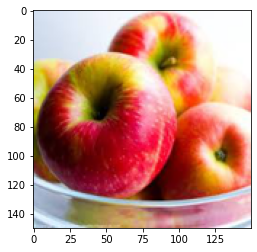

In [ ]:
from google.colab import files
uploaded = files.upload()

threshold = 0.4
 
for filename in uploaded.keys():
  img = Image.open(filename)
  img = img.resize((150,150))
  plt.imshow(img)
  imgArr = np.array(img)[:,:,:3]
  imgArr = imgArr.reshape((1,150,150,3))
  preds = model.predict(imgArr)[0,0]
  print(preds)

if preds > threshold:
  print('Fresh!')
else:
  print('Rotten!')

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
vggModel = VGG16(include_top=True, input_shape=(224,224,3))

Saving fresh.png to fresh (2).png
1.0149975e-09


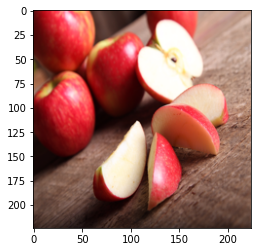

In [ ]:
from google.colab import files
uploaded = files.upload()

threshold = 0.4
 
for filename in uploaded.keys():
  img = Image.open(filename)
  img = img.resize((224,224))
  plt.imshow(img)
  imgArr = np.array(img)[:,:,:3]
  imgArr = imgArr.reshape((1,224,224,3)) 
  preds = vggModel.predict(imgArr)[0,0]
  print(preds)